In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import time
import os
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
path_json = '/home/kotvkaske/MATHEMATICAL_WORKSHOP/'
files = os.listdir(path_json+'data_new/')

In [3]:
## Скользящее среднее
def plotMovingAverage_estim(series,n):
    predict = series.rolling(window=n).mean()
    plt.figure(figsize=(15,5))
    plt.title("Скользящее среднее\n размер окна = {}".format(n))
    plt.plot(predict, "r", label="Предсказывание")
    plt.plot(series[n:], label="Исходный график")
    plt.legend(loc="upper left")
    #print(predict)
    print(mean_squared_error(series[n:],predict[n:]),"Среднеквадр.ошибка")
    print(mean_absolute_error(series[n:], predict[n:]),"Абс.ошибка")

In [4]:
## Скользящее среднее
def plotMovingAverage(series, n):
    predict = series.rolling(window=n).mean()
    plt.figure(figsize=(15,5))
    plt.title("Скользящее среднее\n размер окна = {}".format(n))
    plt.plot(predict, "r", label="Предсказывание")
    plt.plot(series[n:], label="Исходный график")
    plt.legend(loc="upper left")

In [5]:
def func(data):
    result=pd.json_normalize(first['datapoints'])
    result.drop("unit",axis=1,inplace=True)
    result.head()
    result['timestamp']=pd.to_datetime(result['timestamp'],unit='ms')
    X=result['timestamp']
    Y=result['average']
    X_train = X[0:round(2*len(X)/3)]
    Y_train = Y[0:round(2*len(Y)/3)]
    X_test=X[round(2*len(X)/3):]
    Y_test=Y[round(2*len(Y)/3):]
    plt.figure(figsize=(18, 3.5))
    plt.title("Разбиение исходных данных на train/test")
    plt.plot(X_train,Y_train, color='lime')
    plt.plot(X_test,Y_test)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    plotMovingAverage_estim(Y, 50)
    result=result.set_index(['timestamp'])
    Y=result.average.resample('60min').sum()
    plotMovingAverage(Y,10)

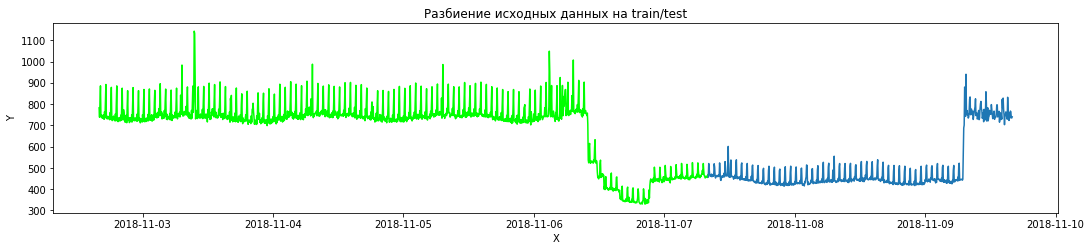

3243.5446916738165 Среднеквадр.ошибка
34.978318047788655 Абс.ошибка


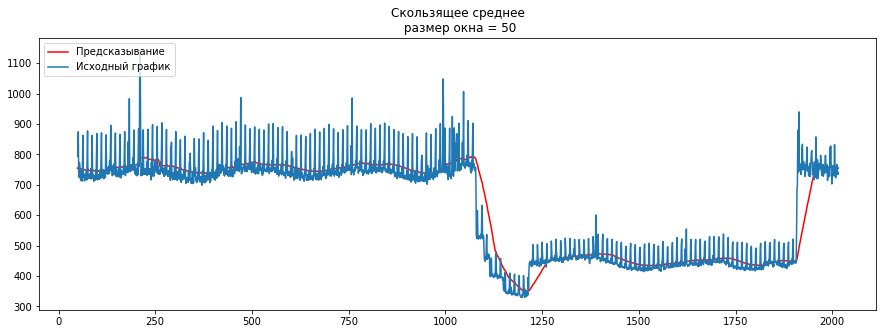

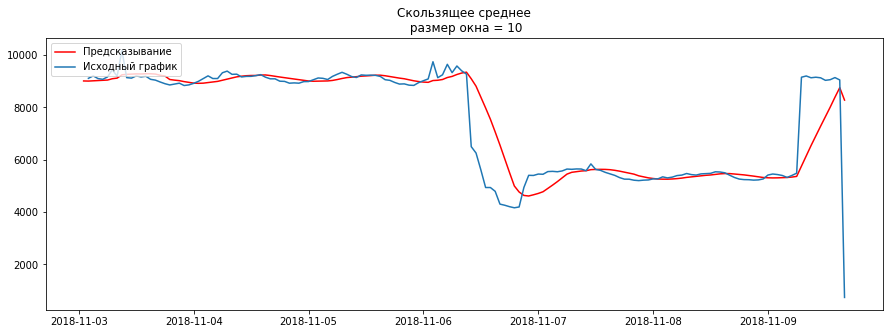

In [6]:
with open (path_json+'/data_new/'+files[28]) as data:
    first = json.load(data)
func(first)